**ASSIGNMENT-2**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [2]:
df = pd.read_csv("tips (data for regression problem).csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Encode categorical features
encoded_data = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Splitting data into features (X) and target (y)
X = encoded_data.drop(columns='tip')
y = encoded_data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression': SVR(kernel='linear', C=1.0),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Training and evaluating each model
results = {}
for model_name, model in models.items():
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2 Score': r2}

# Display the results
results_df = pd.DataFrame(results).T.sort_values(by='R2 Score', ascending=False)
print(results_df)

                                MSE  R2 Score
Lasso Regression           0.612209  0.510221
Support Vector Regression  0.651119  0.479093
Ridge Regression           0.702071  0.438331
Linear Regression          0.703357  0.437302
K-Nearest Neighbors        0.876373  0.298886
Random Forest              0.919672  0.264246
Decision Tree              1.255194 -0.004178


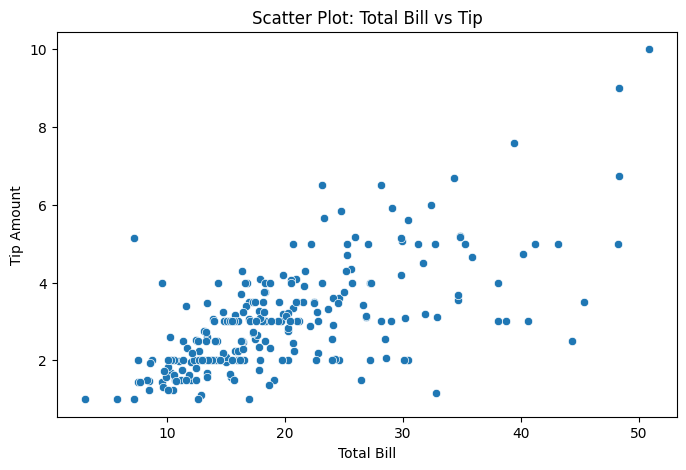

In [6]:
# Scatter Plot for Total Bill vs Tip
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

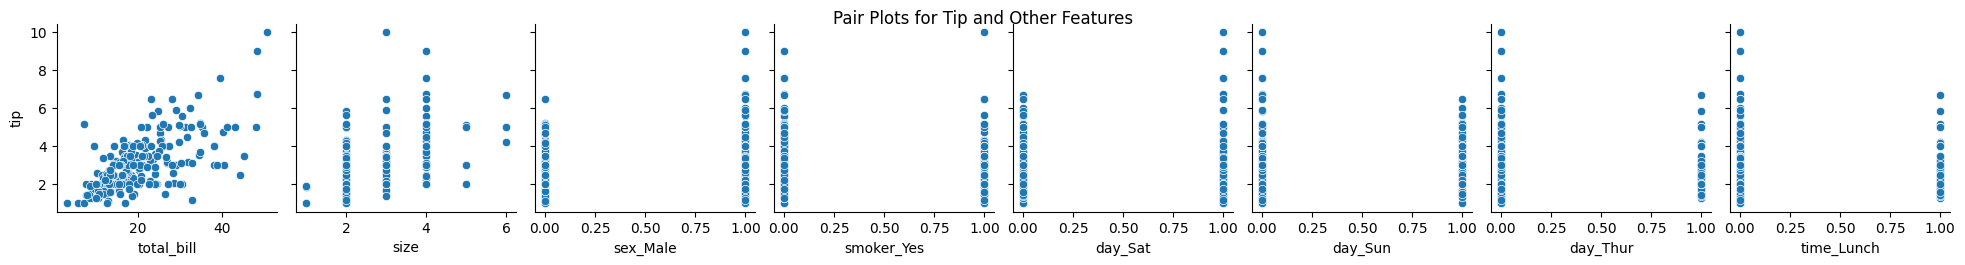

In [7]:
# Pair Plot
sns.pairplot(encoded_data, y_vars='tip', x_vars=['total_bill', 'size', 'sex_Male', 
                                                 'smoker_Yes', 'day_Sat', 'day_Sun', 
                                                 'day_Thur', 'time_Lunch'], height=2.5)
plt.suptitle('Pair Plots for Tip and Other Features', y=1.02)
plt.show()

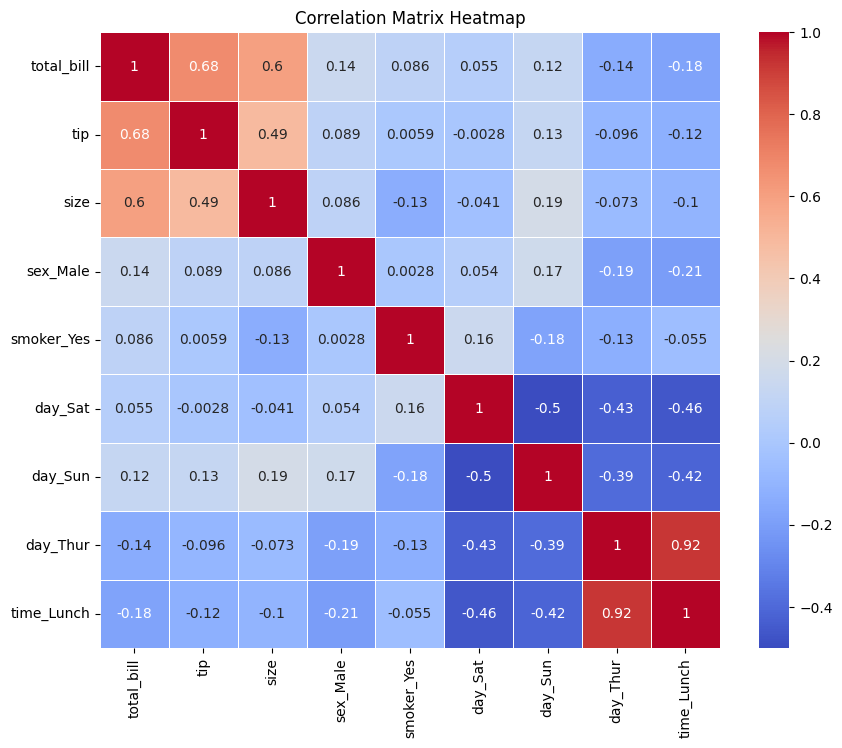

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = encoded_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
X_train_sm = sm.add_constant(X_train_scaled)  # Add intercept for OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# Perform Rainbow test
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f"Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_val}")
if rainbow_p_val < 0.05:
    print("The data suggests non-linearity (p-value < 0.05). Consider using more complex models.")
else:
    print("The data does not show significant evidence of non-linearity.")

Rainbow test statistic: 1.5493994941797324, p-value: 0.01864740855312359
The data suggests non-linearity (p-value < 0.05). Consider using more complex models.


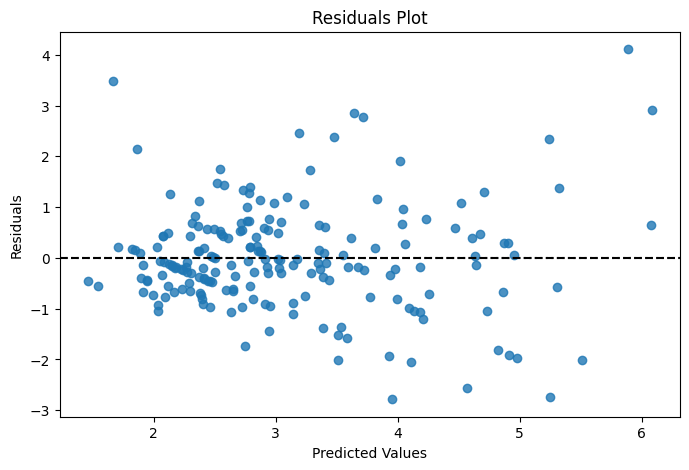

In [10]:
# Predict using linear model
y_train_pred = model.predict(X_train_sm)

# Residuals plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_train_pred, y=residuals,line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='black')
plt.show()

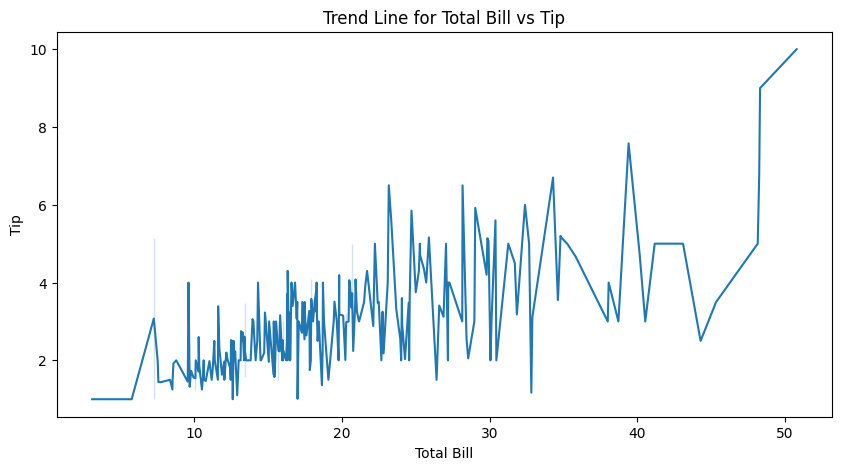

In [11]:
# Line plot 
if 'total_bill' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='total_bill', y='tip', data=df.sort_values(by='total_bill'))
    plt.title('Trend Line for Total Bill vs Tip')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()

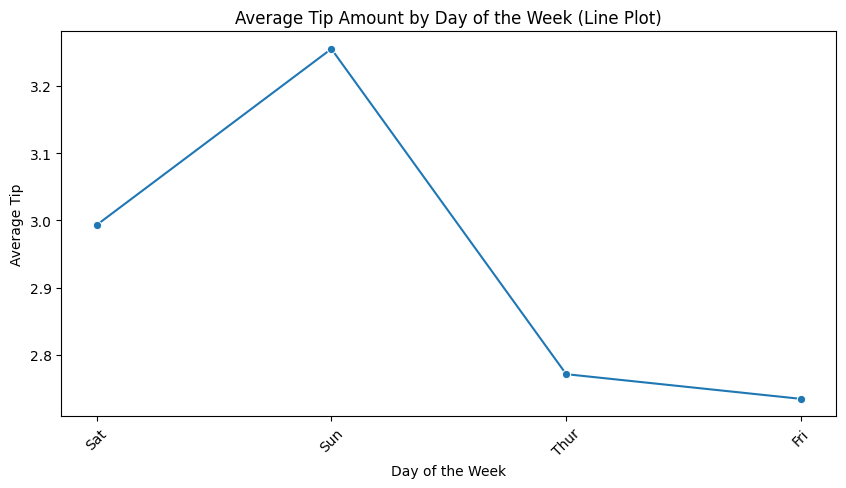

In [12]:
# Calculate the average tip for each day
avg_tips_by_day = df.groupby('day')['tip'].mean().reindex(df['day'].value_counts().index)

# Create a line plot to show trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_tips_by_day.index, y=avg_tips_by_day.values, marker='o')
plt.title('Average Tip Amount by Day of the Week (Line Plot)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

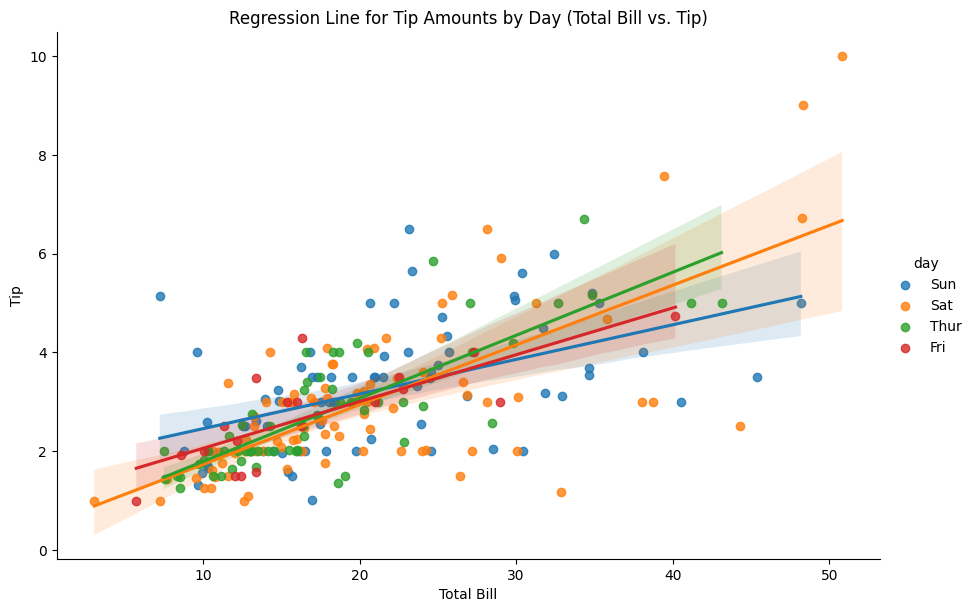

In [13]:
# Scatter plot with regression lines for tips vs. total bill by day
plt.figure(figsize=(12, 8))
sns.lmplot(x='total_bill', y='tip', hue='day', data=df, height=6, aspect=1.5)
plt.title('Regression Line for Tip Amounts by Day (Total Bill vs. Tip)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [14]:
# Initialize models
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Train models
svr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

svr_predictions = svr_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
# Calculate MAE, MSE, R-squared for SVR
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Calculate MAE, MSE, R-squared for KNN
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print the results
print("SVR - MAE:", svr_mae, "MSE:", svr_mse, "R2:", svr_r2)
print("KNN - MAE:", knn_mae, "MSE:", knn_mse, "R2:", knn_r2)

SVR - MAE: 0.5679864502285389 MSE: 0.5323763062616395 R2: 0.5740891915042663
KNN - MAE: 0.718857142857143 MSE: 0.8763725714285714 R2: 0.29888587066985495
